In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

In [4]:
data.size

6912

In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Surprisingly we have all our columns numeric, none of them happen to have null values, we will check either way.

In [8]:
data.isnull().sum().sum()

0

clearly, no missing values; lets check for outlier

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


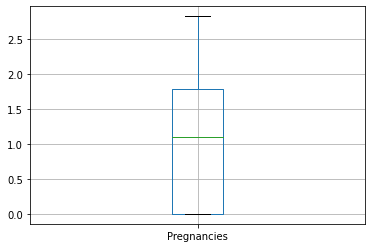

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


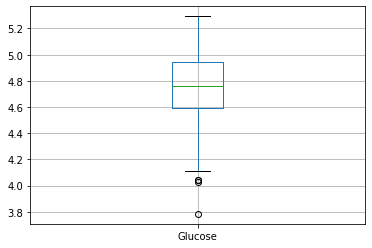

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


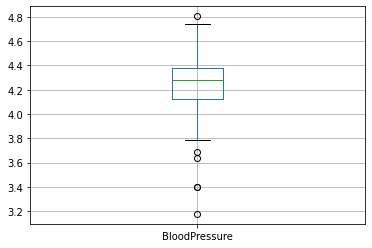

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


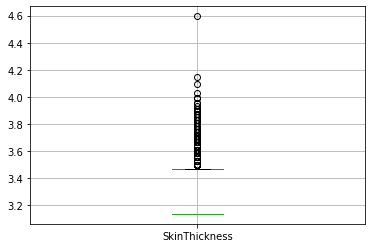

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


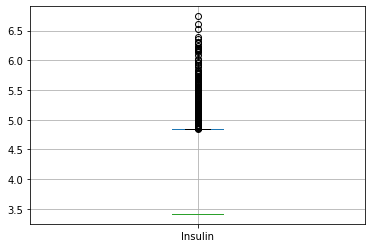

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


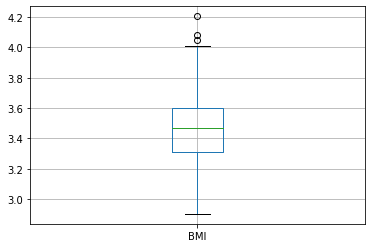

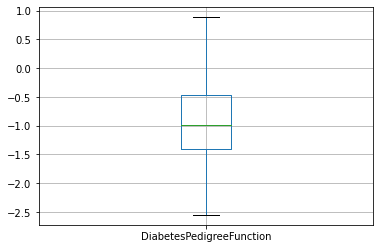

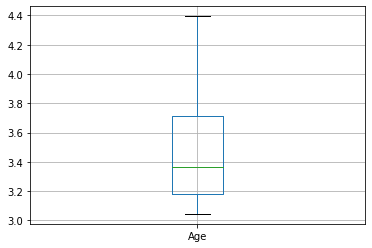

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


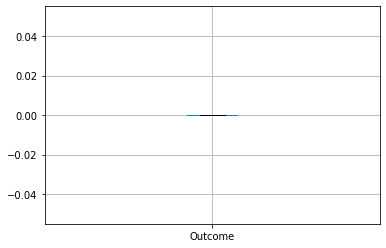

In [9]:
for each in data.columns:
    tempdf = data.copy()
    tempdf[each] = np.log(tempdf[each])
    tempdf.boxplot(each)
    plt.show()

a few features do have outliers.

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
for each in data.columns:
    length = len(data[each].unique())
    percentage = np.round(length/len(data)*100 , 2)
    print(f'{each} :=> {length}; i.e. {percentage}%')

Pregnancies :=> 17; i.e. 2.21%
Glucose :=> 136; i.e. 17.71%
BloodPressure :=> 47; i.e. 6.12%
SkinThickness :=> 51; i.e. 6.64%
Insulin :=> 186; i.e. 24.22%
BMI :=> 248; i.e. 32.29%
DiabetesPedigreeFunction :=> 517; i.e. 67.32%
Age :=> 52; i.e. 6.77%
Outcome :=> 2; i.e. 0.26%


In [14]:
for each in data.columns:
    if len(data[each].unique())<55:
        print(f"{each} :=> {data[each].unique()}")
    else:
        pass

Pregnancies :=> [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
BloodPressure :=> [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness :=> [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
Age :=> [50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60 28 45 35 46
 56 37 48 40 25 24 58 42 44 39 36 23 61 69 62 55 65 47 52 66 49 63 67 72
 81 64 70 68]
Outcome :=> [1 0]


Outcome is going to be our target attribute/feature

In [17]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

we will go out on a limb and assume 0 - means no diabetes and 1 - diabetes

#### Establish relationship with attributes and targets

In [20]:

#get the avg values of each attribute in relation to our target feature outcomes
data.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Feature Scaling
Now looking at the labels, we have numerals of floats and integers spanning huge ranges; for this we will be performing some feature Scaling; standardization to be exact as it is robust to outliers; 

> Before that however, we will take out our target feature

###### Split dataframe

In [34]:
X = data.drop('Outcome', axis = 1)
Y = data['Outcome']

In [37]:
X.shape, Y.size

((768, 8), 768)

In [39]:
X.head(), Y.tail()

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  ,
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, dtype: int64)

###### Perform Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [42]:
X1 = std_scaler.fit_transform(X)
X1

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

#### Train Test Split
This time around we will be adding an additional parameter to our function, the stratify; this is to basically ensure that there is some care taken in ensuring that the distinct values in our target attribute(0, 1) are well represented 

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.2, stratify=Y, random_state = 97)

In [51]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Model Building and Training

In [46]:
from sklearn import svm
from sklearn.metrics import accuracy_score #classification metrics

In [52]:
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

##### model evaluation

In [58]:
prediction = svm_model.predict(X_train)
print(prediction[:10])
Y_train.head(10)

[1 0 0 0 0 0 1 0 0 0]


761    1
232    0
467    0
314    1
308    1
122    0
244    0
633    0
758    0
488    0
Name: Outcome, dtype: int64

##### metrics

In [59]:
acc_score = accuracy_score(prediction, Y_train)
acc_score

0.7703583061889251

77% on training data isnt that bad, we will check out with the test data

In [60]:
test_pred = svm_model.predict(X_test)
print(test_pred[:10])
Y_train.head(10)

[0 0 0 0 1 1 0 1 1 0]


761    1
232    0
467    0
314    1
308    1
122    0
244    0
633    0
758    0
488    0
Name: Outcome, dtype: int64

In [61]:
acc_score = accuracy_score(test_pred, Y_test)
acc_score

0.7922077922077922

79% on our test set; unexpected

Lets try and make a prediction. we will take an observation from our dataset, and put it in a list. we will take out the output label.
1. we store the x labels in a list. 
2. applies the numpy asarray() method, to convert it to an array for easy processing. 
3. the next thing is to reshape our array, as our prediction this time around is going to be a single array as compared to the previous nested array of standardized 600+ observations 
4. Remember our training data was standardized prior to it being fed to our model, we repeat the same thing here too

In [68]:
vals = [8, 183, 64, 0, 0, 23.3, 0.672, 32] #outcome is 1

vals_arr = np.asarray(vals)
print('vals_arr ', vals_arr)

val_arr_reshaped = vals_arr.reshape(1,-1)
print("val_arr_reshaped ", val_arr_reshaped)

std_vals = std_scaler.fit_transform(val_arr_reshaped)
print('std_vals', std_vals)

prediction = svm_model.predict(std_vals)
if prediction[0]=='0':
    print('\nOur patient in question isnt diabetic')
else:
    print('\nPatient is diabetic, contact your physician')

vals_arr  [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]
val_arr_reshaped  [[  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
std_vals [[0. 0. 0. 0. 0. 0. 0. 0.]]

Patient is diabetic, contact your physician
